# Assignment 1 - CS110, Prof. Drummond.
## Oscar Engelbrektson
### Spring 2019

### 1. 
(#sort) Implement three-way merge sort in Python. It should at a minimum accept lists of integers as input and you should provide at least three test cases that demonstrate the correctness of your code.

In [1]:
def merge_sort_3(a):
    #If one element, return element
    if len(a) <= 1:
        return a
        
    #If two elements, return sorted
    #Necessary because "third" doesn't work on len(a)==2
    if len(a) == 2:
        if a[0] < a[1]:
            return a
        else: 
            return [a[1], a[0]]

    #Split array in 3
    else:
        #Index to split at
        third = int(len(a)/3)
        
        #Dummy variable, one larger than largest element in array
        mx = max(a)+1
        
        #Add mx for "empty" array to lose in comparison
        L = merge_sort_3(a[:third]) + [mx] #Left array
        C = merge_sort_3(a[third:2*third]) + [mx] #Center array
        R = merge_sort_3(a[2*third:]) + [mx] #Right array
        
        #Merge
        #Compare smallest elements in each array, select smallest
        #For-loop 1 to len(a), since len(a) == len(L)+len(C)+len(R)
        for i in range(len(a)):
            a[i] = min(L[0],C[0],R[0])
            
            #Increment array from which element was selected
            if a[i] == L[0]:
                L = L[1:]
            elif a[i] == C[0]:
                C = C[1:]
            else:
                R = R[1:]
            
        return a

In [2]:
#Check if merge_sort_3 works by comparing to built-in sort function
import numpy as np

def merge_sort_3_checker():
    j = 0
    correct = True
    
    #Check up to 50 times
    while j <= 50 and correct:
        
        #On random list of length between 0 and 1000, 
        #with values between -100 and 100
        test_array = list(np.random.randint(
            -100, 100, np.random.randint(0, 1000, 1)))
        
        #Sort using built-in function
        a = test_array
        a.sort()
        
        #If sorted arrays don't match, return False
        if a != merge_sort_3(test_array):
            correct = False
        
        #increment j
        j += 1
        
    return correct

merge_sort_3_checker()

True

### 2.
(#sort) Implement a second version of three-way merge sort that calls insertion sort when sublists are below a certain length (of your choice) rather than continuing the subdivision process. Justify what might be an appropriate threshold for the input array for applying insertion sort.

## Insertion Sort

In [3]:
def insertion_sort(a):
    for i in range(1, len(a)):
        current = a[i]
        j = i -1
        #Compare element to the left, if larger swap. Repeat.
        while j>=0 and a[j]>current:
            a[j+1] = a[j]
            j -=1
        a[j+1] = current
    return a

In [4]:
#Check insertion sort works

import numpy as np

def insertion_sort_checker():
    j = 0
    correct = True
    
    #Check up to 50 times
    while j <= 50 and correct:
        
        #On random list of length between 0 and 1000, 
        #with values between -100 and 100
        test_array = list(np.random.randint(
            -100, 100, np.random.randint(0, 1000, 1)))
        
        #Sort using built-in function
        a = test_array
        a.sort()
        
        #If sorted arrays don't match, return False
        if a != insertion_sort(test_array):
            correct = False
        
        #increment j    
        j += 1
        
    return correct

insertion_sort_checker()

True

## Merge-Insertion Sort Hybrid

In [5]:
def merge_insertion_sort_3(a, t): 
    #t input array size threshold for applying insertion sort
    if len(a) < 1: #For speed: if one element, return element
        return a
        
    if len(a) <= t: #array below threshhold for insertion sort?
            insertion_sort(a)
            
    else:
        #Index to split at
        third = int(len(a)/3)
        
        #Dummy variable, one larger than largest element in array
        mx = max(a)+1
        
        #Add mx for "empty" array to lose in comparison
        L = merge_sort_3(a[:third]) + [mx] #Left array
        C = merge_sort_3(a[third:2*third]) + [mx] #Center array
        R = merge_sort_3(a[2*third:]) + [mx] #Right array
        
        #Merge
        #Compare smallest elements in each array, select smallest
        #For-loop 1 to len(a), since len(a) == len(L)+len(C)+len(R)
        for i in range(len(a)):
            a[i] = min(L[0],C[0],R[0])
            
            #Increment array from which element was selected
            if a[i] == L[0]:
                L = L[1:]
            elif a[i] == C[0]:
                C = C[1:]
            else:
                R = R[1:]
            
        return a

In [6]:
#Check if merge_insertion_sort_3 works for different a and t
#by comparing to built-in sort function
import numpy as np

def merge_insertion_sort_3_checker():
    j = 0
    correct = True
    #Check for different values of t
    for t in range(2, 10):
        
        #Check up to 50 times
        while j <= 50 and correct:
            
            #On random list of length between 0 and 1000, 
            #with values between -100 and 100
            test_array = list(np.random.randint(
                -100, 100, np.random.randint(0, 1000, 1)))
            a = test_array
            a.sort()
            
            #If sorted arrays don't match, return False
            if a != merge_insertion_sort_3(test_array, t):
                correct = False
            
            #increment j
            j += 1
            
    return correct

merge_insertion_sort_3_checker()

True

### Evaluating optimal t for Merge-Insertion Sort

In [7]:
#Evaluating optimal value for t by comparing run times
import time
import numpy as np

t5_time = []
t10_time = []
t20_time = []
t45_time = []
t70_time = []
t100_time = []
t200_time = []
t500_time = []
#insertion_time = []

i = 30 #Number of times to run random arrays of size n

ns = [n for n in range(5, 10010, 1000)]
for n in ns:
    t5_temp = 0
    t10_temp = 0
    t20_temp = 0
    t45_temp = 0
    t70_temp = 0
    t100_temp = 0
    t200_temp = 0
    t500_temp = 0
    #insertion_temp = 0
    for _ in range(i):
        
        #t=5
        start1 = time.time()
        merge_insertion_sort_3(
            list(np.random.randint(-100, 100, n)), 5)
        end1 = time.time()
        t5_temp += (end1 - start1)
        
        #t=10
        start2 = time.time()
        merge_insertion_sort_3(
            list(np.random.randint(-100, 100, n)), 10)
        end2 = time.time()
        t10_temp += (end2 - start2)
        
        #t=20
        start3 = time.time()
        merge_insertion_sort_3(
            list(np.random.randint(-100, 100, n)), 20)
        end3 = time.time()
        t20_temp += (end3 - start3)
        
        #t=45
        start4 = time.time()
        merge_insertion_sort_3(
            list(np.random.randint(-100, 100, n)), 45)
        end4 = time.time()
        t45_temp += (end4 - start4)
        
        #t=70
        start5 = time.time()
        merge_insertion_sort_3(
            list(np.random.randint(-100, 100, n)), 70)
        end5 = time.time()
        t70_temp += (end5- start5)
        
        #t=100
        start6 = time.time()
        merge_insertion_sort_3(
            list(np.random.randint(-100, 100, n)), 100)
        end6 = time.time()
        t100_temp += (end6 - start6)
        
        #t=200
        start7 = time.time()
        merge_insertion_sort_3(
            list(np.random.randint(-100, 100, n)), 200)
        end7 = time.time()
        t200_temp += (end7 - start7)
        
 
        #t500
        start8 = time.time()
        merge_insertion_sort_3(
            list(np.random.randint(-100, 100, n)), 500)
        end8 = time.time()
        t500_temp += (end8 - start8)
        

    t5_time.append(t5_temp/i)
    t10_time.append(t10_temp/i)
    t20_time.append(t20_temp/i)
    t45_time.append(t45_temp/i)
    t70_time.append(t70_temp/i)
    t100_time.append(t100_temp/i)
    t200_time.append(t200_temp/i)
    t500_time.append(t500_temp/i)
    #insertion_time.append(insertion_temp/i)

In [8]:
import matplotlib.pyplot as plt
#ns = [n for n in range(5, 110, 5)]
ns = [n for n in range(5, 10010, 1000)]

plt.plot(ns,t5_time, label = "t=5")
plt.plot(ns,t10_time, label = "t=10")
plt.plot(ns,t20_time, label = "t=20")
plt.plot(ns,t45_time, label = "t=45")
plt.plot(ns,t70_time, label = "t=70")
plt.plot(ns,t100_time, label = "t=100")
plt.plot(ns,t200_time, label = "t=200")
plt.plot(ns,t500_time, label = "t=500")
#plt.plot(ns,insertion_time, label = "t=500")


plt.title("Run Time Merge+Insertion Sort Algorithm")
plt.xlabel("n")
plt.ylabel("Runtime (s)")
plt.legend(loc=0)
plt.show()

<Figure size 640x480 with 1 Axes>

### 3. 
(#complexity, #optimalalgorithm) Analyze and compare the practical run times of regular merge sort, three-way merge sort, and the augmented merge sort from (2) by producing a plot that illustrates how each running time grows with input size. Make sure to:
1. define what each algorithm's complexity is
2. enumerate the explicit assumptions made to assess each run time of the algorithm's run time. 
3. and compare your benchmarks with the theoretical result we have discussed in class.

### Binary Merge Sort

In [9]:
def merge_sort(a):
    #If one element, return element
    if len(a) <= 1:
        return a

    #Split array in 2
    else:
        #Index to split
        half = int(len(a)/2)
        
        #Dummy variable, one larger than largest element in array
        mx = max(a)+1
        
        #Add mx for "empty" array to lose in comparison
        L = merge_sort_3(a[:half]) + [mx] #Left array
        R = merge_sort_3(a[half:]) + [mx] #Right array
        
        #Merge
        #Compare smallest elements in each array, select smallest
        #For-loop 1 to len(a), since len(a) == len(L)+len(R)
        for i in range(len(a)):
            a[i] = min(L[0],R[0])
            
            #Increment array from which element was selected
            if a[i] == L[0]:
                L = L[1:]
            else:
                R = R[1:]
            
        return a

In [10]:
#Check if merge_insertion_sort_3 works for different a and t
#by comparing to built-in sort function
import numpy as np

def merge_sort_checker():
    j = 0
    correct = True
    #Check for different values of t
        
    #Check up to 50 times
    while j <= 50 and correct:            
        #On random list of length between 0 and 1000, with values between -100 and 100
        test_array = list(np.random.randint(
            -100, 100, np.random.randint(0, 1000, 1)))
        a = test_array
        a.sort()
            
        #If sorted arrays don't match, return False
        if a != merge_sort(test_array):
            correct = False
            
        #increment j
        j += 1
            
    return correct

merge_sort_checker()

True

# Practical run time comparison

In [11]:
import time
import numpy as np

merge_time = []
merge3_time = []
merge3_insert_time = []
i = 10 #Number of times to run random arrays of size n

ns = [n for n in range(10, 10011, 1000)]
for n in ns:
    merge_temp = 0
    merge3_temp = 0
    merge3_insert_temp = 0
    for _ in range(i):
            
        #Binary merge_sort
        start = time.time()
        merge_sort(list(np.random.randint(-100, 100, n)))
        end = time.time()
        merge_temp += (end - start)
        
        #Ternary merge sort
        start = time.time()
        merge_sort_3(list(np.random.randint(-100, 100, n)))
        end = time.time()
        merge3_temp += (end - start)
        
        #Ternary merge-insertion sort
        start = time.time()
        merge_insertion_sort_3(list(np.random.randint(-100, 100, n)), 10) 
        end = time.time()
        merge3_insert_temp += (end - start)
        
        
    merge_time.append(merge_temp/i)
    merge3_time.append(merge3_temp/i)
    merge3_insert_time.append(merge3_insert_temp/i)  

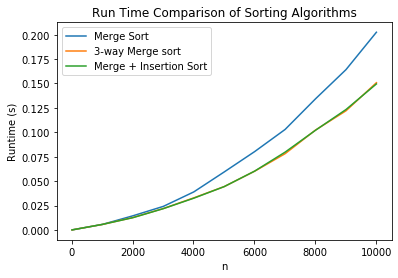

In [12]:
import matplotlib.pyplot as plt

ns = [n for n in range(10, 10011, 1000)]

plt.plot(ns,merge_time , label = "Merge Sort")
plt.plot(ns,merge3_time, label = "3-way Merge sort")
plt.plot(ns,merge3_insert_time, label = "Merge + Insertion Sort")


plt.title("Run Time Comparison of Sorting Algorithms")
plt.xlabel("n")
plt.ylabel("Runtime (s)")
plt.legend(loc=0)
plt.show()

# Theoretical Runtime comparison

In [13]:
import math
ns = [n for n in range(10, 10011, 1000)]
binary_merge = [n*math.log(n, 2) for n in ns] #log base 2
ternary_merge = [n*math.log(n, 3) for n in ns] #log base 3
merge_insertion = [n*(math.log(n, 3)) for n in ns] #log base 3

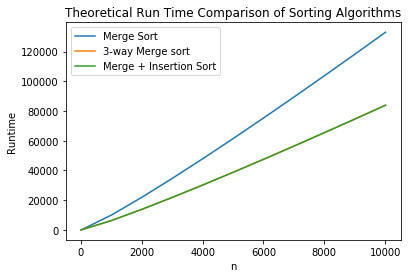

In [14]:
import matplotlib.pyplot as plt

ns = [n for n in range(10, 10011, 1000)]

plt.plot(ns,binary_merge , label = "Merge Sort")
plt.plot(ns,ternary_merge, label = "3-way Merge sort")
plt.plot(ns,merge_insertion, label = "Merge + Insertion Sort")


plt.title("Theoretical Run Time Comparison of Sorting Algorithms")
plt.xlabel("n")
plt.ylabel("Runtime")
plt.legend(loc=0)
plt.show()

### 4. [Optional Challenge]
(#sort and/or #optimalalgorithm) Implement k-way merge sort, where the user specifies k. Develop and run experiments to support a hypothesis about the “best” value of k.

In [15]:
def kway_merge_sort(a, k):
    #Generalizes to any k
    if len(a) <= 1:
        return a

    #Split array in k parts
    else:
        part = int(len(a)/k)
        #Since clever trick with if len(a)==2, doesn't generalize beyond k=3
        #We need a general solution for the case where len(a)%k != 0. Thus,
        #We create a a boolean that will be true for len(a)%k subarrays
        remainder = len(a)%k
        
        #For indexing to work for all k, we need a variable to 
        #store the end of the last subarray. It will be the start of the new one
        end = 0
        
        #for the comparison procedure to generalize to k subarrays
        #we need to store all subarrays in a list
        #We can then compare the first element in every list of the list
        subarrays = []
        
        mx = max(a)+1
        for p in range(k):
            
            #check if part should be one larger
            if p < remainder:
                subarrays.append(kway_merge_sort(a[end:end+part+1],k) + [mx])
                end = end+part+1
            else:
                subarrays.append(kway_merge_sort(a[end:end+part],k) + [mx])
                end = end+part
        
        for i in range(len(a)):
            #Smallest element in each subarray is competitor 
            #for smallest element in array
            competitors = [subarray[0] for subarray in subarrays]
            a[i] = min(competitors)
            
            #Increment list from which competitor was selected
            position = competitors.index(a[i])
            subarrays[position] = subarrays[position][1:]
        
        return a

In [16]:
#Check if merge_insertion_sort_3 works for different a and t
#by comparing to built-in sort function
import numpy as np

def kway_merge_sort_checker():
    j = 0
    correct = True
    #Check for different values of t
    for k in range(2, 10):
        
        #Check up to 50 times
        while j <= 50 and correct:
            
            #On random list of length between 0 and 1000, 
            #with values between -100 and 100
            test_array = list(np.random.randint(
                -100, 100, np.random.randint(0, 1000, 1)))
            a = test_array
            a.sort()
            
            #If sorted arrays don't match, return False
            if a != kway_merge_sort(test_array, k):
                correct = False
            
            #increment j
            j += 1
            
    return correct

kway_merge_sort_checker()

True

# Reusing code from Merge-Insertion sort to find best value for k

In [17]:
#Evaluating optimal value for k by comparing run times

import time
import numpy as np

t5_time = []
t10_time = []
t20_time = []
t45_time = []
t70_time = []
t100_time = []
t200_time = []
t500_time = []
#insertion_time = []

i = 5 #Number of times to run random arrays of size n

ns = [n for n in range(5, 10010, 1000)]
for n in ns:
    t5_temp = 0
    t10_temp = 0
    t20_temp = 0
    t45_temp = 0
    t70_temp = 0
    t100_temp = 0
    t200_temp = 0
    t500_temp = 0
    #insertion_temp = 0
    for _ in range(i):
        
        #t=2
        start1 = time.time()
        kway_merge_sort(
            list(np.random.randint(-100, 100, n)), 2)
        end1 = time.time()
        t5_temp += (end1 - start1)
        
        #t=3
        start2 = time.time()
        kway_merge_sort(
            list(np.random.randint(-100, 100, n)), 3)
        end2 = time.time()
        t10_temp += (end2 - start2)
        
        #t=4
        start3 = time.time()
        kway_merge_sort(
            list(np.random.randint(-100, 100, n)), 4)
        end3 = time.time()
        t20_temp += (end3 - start3)
        
        #t=5
        start4 = time.time()
        kway_merge_sort(
            list(np.random.randint(-100, 100, n)), 5)
        end4 = time.time()
        t45_temp += (end4 - start4)
        
        #t=15
        start5 = time.time()
        kway_merge_sort(
            list(np.random.randint(-100, 100, n)), 10)
        end5 = time.time()
        t70_temp += (end5- start5)
        
        #t=30
        start6 = time.time()
        kway_merge_sort(
            list(np.random.randint(-100, 100, n)), 20)
        end6 = time.time()
        t100_temp += (end6 - start6)
    
        #t=50
        start7 = time.time()
        kway_merge_sort(
            list(np.random.randint(-100, 100, n)), 50)
        end7 = time.time()
        t200_temp += (end7 - start7)
        
 
        #t100
        start8 = time.time()
        kway_merge_sort(
            list(np.random.randint(-100, 100, n)), 100)
        end8 = time.time()
        t500_temp += (end8 - start8)
        

    t5_time.append(t5_temp/i)
    t10_time.append(t10_temp/i)
    t20_time.append(t20_temp/i)
    t45_time.append(t45_temp/i)
    t70_time.append(t70_temp/i)
    t100_time.append(t100_temp/i)
    t200_time.append(t200_temp/i)
    t500_time.append(t500_temp/i)
    #insertion_time.append(insertion_temp/i)

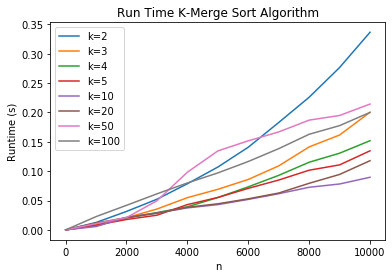

In [18]:
import matplotlib.pyplot as plt
#ns = [n for n in range(5, 110, 5)]
ns = [n for n in range(5, 10010, 1000)]

plt.plot(ns,t5_time, label = "k=2")
plt.plot(ns,t10_time, label = "k=3")
plt.plot(ns,t20_time, label = "k=4")
plt.plot(ns,t45_time, label = "k=5")
plt.plot(ns,t70_time, label = "k=10")
plt.plot(ns,t100_time, label = "k=20")
plt.plot(ns,t200_time, label = "k=50")
plt.plot(ns,t500_time, label = "k=100")
#plt.plot(ns,insertion_time, label = "t=500")


plt.title("Run Time K-Merge Sort Algorithm")
plt.xlabel("n")
plt.ylabel("Runtime (s)")
plt.legend(loc=0)
plt.show()

In [19]:
#Evaluating optimal value for k by comparing run times

import time
import numpy as np

t5_time = []
t10_time = []
t20_time = []
t45_time = []
t70_time = []
t100_time = []
t200_time = []
t500_time = []
#insertion_time = []

i = 5 #Number of times to run random arrays of size n

ns = [n for n in range(5, 25010, 1000)]
for n in ns:
    t5_temp = 0
    t10_temp = 0
    t20_temp = 0
    t45_temp = 0
    t70_temp = 0
    t100_temp = 0
    t200_temp = 0
    t500_temp = 0
    #insertion_temp = 0
    for _ in range(i):
        
        #t=2
        start1 = time.time()
        kway_merge_sort(
            list(np.random.randint(-100, 100, n)), 10)
        end1 = time.time()
        t5_temp += (end1 - start1)
        
        #t=3
        start2 = time.time()
        kway_merge_sort(
            list(np.random.randint(-100, 100, n)), 13)
        end2 = time.time()
        t10_temp += (end2 - start2)
        
        #t=4
        start3 = time.time()
        kway_merge_sort(
            list(np.random.randint(-100, 100, n)), 16)
        end3 = time.time()
        t20_temp += (end3 - start3)
        
        #t=5
        start4 = time.time()
        kway_merge_sort(
            list(np.random.randint(-100, 100, n)), 20)
        end4 = time.time()
        t45_temp += (end4 - start4)
        
        #t=15
        start5 = time.time()
        kway_merge_sort(
            list(np.random.randint(-100, 100, n)), 25)
        end5 = time.time()
        t70_temp += (end5- start5)
        
        #t=30
        start6 = time.time()
        kway_merge_sort(
            list(np.random.randint(-100, 100, n)), 30)
        end6 = time.time()
        t100_temp += (end6 - start6)
        

    t5_time.append(t5_temp/i)
    t10_time.append(t10_temp/i)
    t20_time.append(t20_temp/i)
    t45_time.append(t45_temp/i)
    t70_time.append(t70_temp/i)
    t100_time.append(t100_temp/i)

    #insertion_time.append(insertion_temp/i)

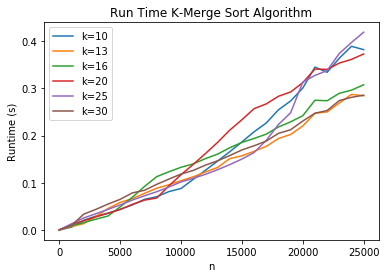

In [20]:
import matplotlib.pyplot as plt
#ns = [n for n in range(5, 110, 5)]
ns = [n for n in range(5, 25010, 1000)]

plt.plot(ns,t5_time, label = "k=10")
plt.plot(ns,t10_time, label = "k=13")
plt.plot(ns,t20_time, label = "k=16")
plt.plot(ns,t45_time, label = "k=20")
plt.plot(ns,t70_time, label = "k=25")
plt.plot(ns,t100_time, label = "k=30")


#plt.plot(ns,insertion_time, label = "t=500")


plt.title("Run Time K-Merge Sort Algorithm")
plt.xlabel("n")
plt.ylabel("Runtime (s)")
plt.legend(loc=0)
plt.show()

In [21]:
#Evaluating optimal value for k by comparing run times

import time
import numpy as np

t5_time = []
t10_time = []
t20_time = []
t45_time = []
t70_time = []
t100_time = []
t200_time = []
t500_time = []
#insertion_time = []

i = 5 #Number of times to run random arrays of size n

ns = [n for n in range(5, 25010, 1000)]
for n in ns:
    t5_temp = 0
    t10_temp = 0
    t20_temp = 0
    t45_temp = 0
    t70_temp = 0
    t100_temp = 0
    t200_temp = 0
    t500_temp = 0
    #insertion_temp = 0
    for _ in range(i):
        
        #t=2
        start1 = time.time()
        kway_merge_sort(
            list(np.random.randint(-100, 100, n)), 10)
        end1 = time.time()
        t5_temp += (end1 - start1)
        
        #t=3
        start2 = time.time()
        kway_merge_sort(
            list(np.random.randint(-100, 100, n)), 11)
        end2 = time.time()
        t10_temp += (end2 - start2)
        
        #t=4
        start3 = time.time()
        kway_merge_sort(
            list(np.random.randint(-100, 100, n)), 12)
        end3 = time.time()
        t20_temp += (end3 - start3)
        
        #t=5
        start4 = time.time()
        kway_merge_sort(
            list(np.random.randint(-100, 100, n)), 13)
        end4 = time.time()
        t45_temp += (end4 - start4)
        
        #t=15
        start5 = time.time()
        kway_merge_sort(
            list(np.random.randint(-100, 100, n)), 14)
        end5 = time.time()
        t70_temp += (end5- start5)
        
        #t=30
        start6 = time.time()
        kway_merge_sort(
            list(np.random.randint(-100, 100, n)), 15)
        end6 = time.time()
        t100_temp += (end6 - start6)
        

    t5_time.append(t5_temp/i)
    t10_time.append(t10_temp/i)
    t20_time.append(t20_temp/i)
    t45_time.append(t45_temp/i)
    t70_time.append(t70_temp/i)
    t100_time.append(t100_temp/i)

    #insertion_time.append(insertion_temp/i)

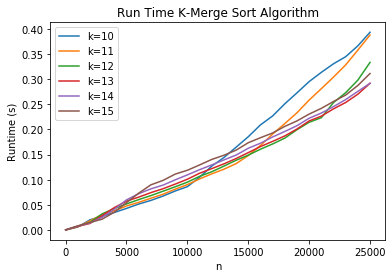

In [22]:
import matplotlib.pyplot as plt
#ns = [n for n in range(5, 110, 5)]
ns = [n for n in range(5, 25010, 1000)]

plt.plot(ns,t5_time, label = "k=10")
plt.plot(ns,t10_time, label = "k=11")
plt.plot(ns,t20_time, label = "k=12")
plt.plot(ns,t45_time, label = "k=13")
plt.plot(ns,t70_time, label = "k=14")
plt.plot(ns,t100_time, label = "k=15")


#plt.plot(ns,insertion_time, label = "t=500")


plt.title("Run Time K-Merge Sort Algorithm")
plt.xlabel("n")
plt.ylabel("Runtime (s)")
plt.legend(loc=0)
plt.show()